# GUIA 4

## Ejercicio 3

Pruebe varios valores de k (por ejemplo entre 2 y 10) para el conjunto de datos Iris, calcule para cada k una métrica de clustering (con sklearn) y encuentre el k óptimo para k-medias

### Métricas:
* Matriz de contingencia: Comparación de predicción vs clases reales
* Rand Index: Evalúa la similitud entre clusters. RI=1 indica 100% de coincidencia, RI=0 indica nula coincidencia
* F1 score: Mide la presición y sensibilidad del modelo. F1=1 -> 100% de aciertos, F1=0 -> 0% de aciertos
* Elbow: Técnica visual para determinar el k óptimo (donde agregar más clusters no reduce significativamente el error cuadrático)



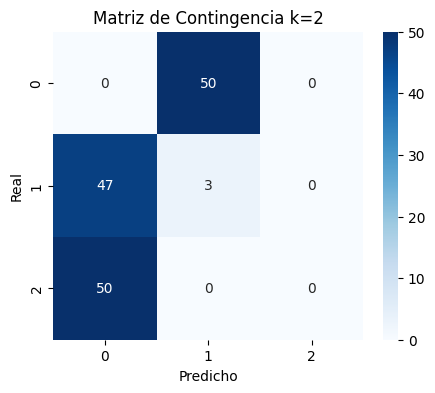

Adjusted Rand Index k=2: 0.5399218294207123
F1 Score k=2: 0.01941747572815534


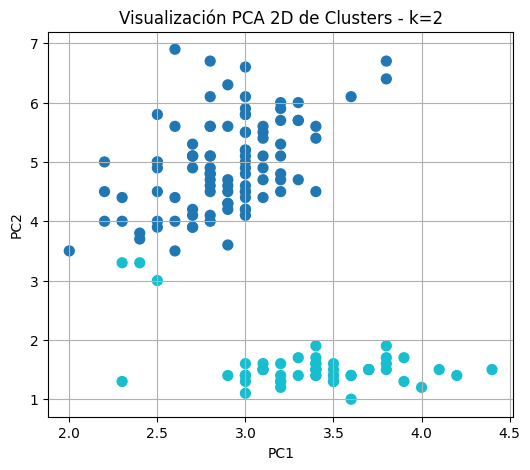

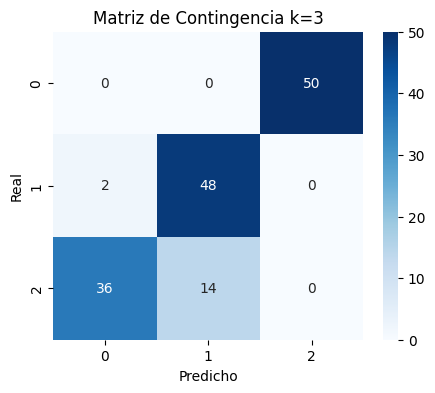

Adjusted Rand Index k=3: 0.7302382722834697
F1 Score k=3: 0.2857142857142857


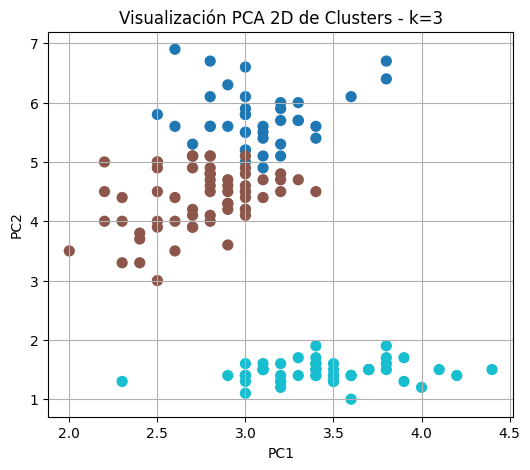

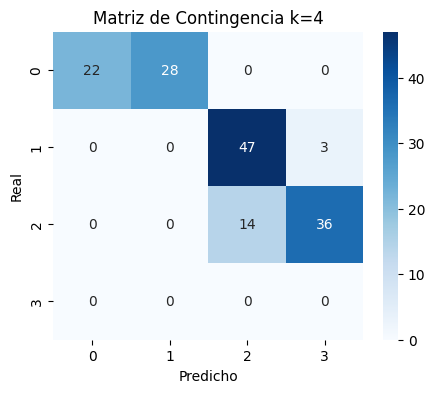

Adjusted Rand Index k=4: 0.5744686546766138
F1 Score k=4: 0.21584084084084085


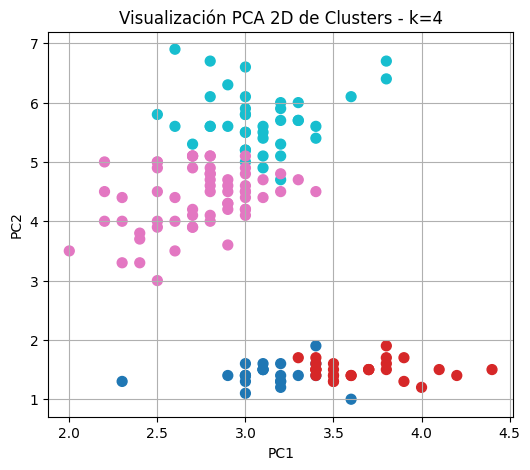

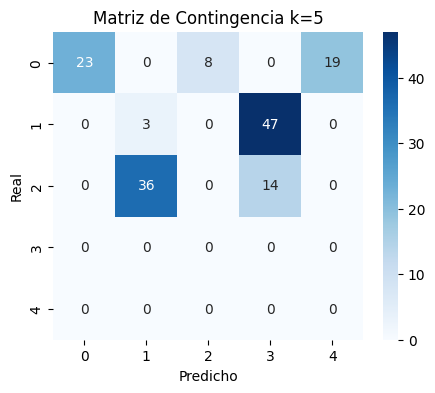

Adjusted Rand Index k=5: 0.5362779801296191
F1 Score k=5: 0.1395105433276897


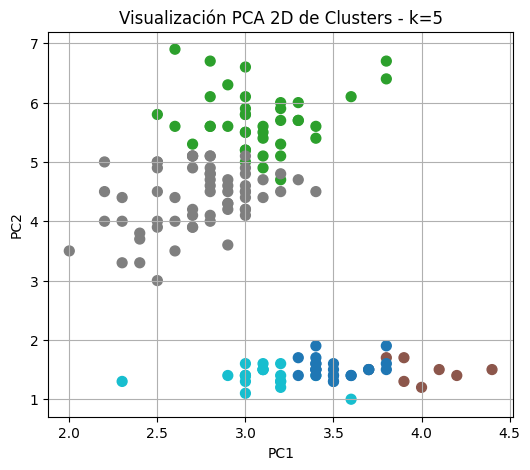

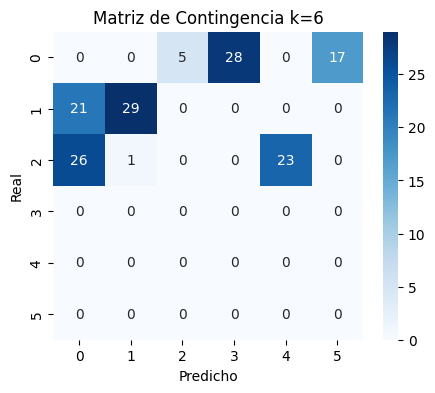

Adjusted Rand Index k=6: 0.4322682004099212
F1 Score k=6: 0.12083333333333333


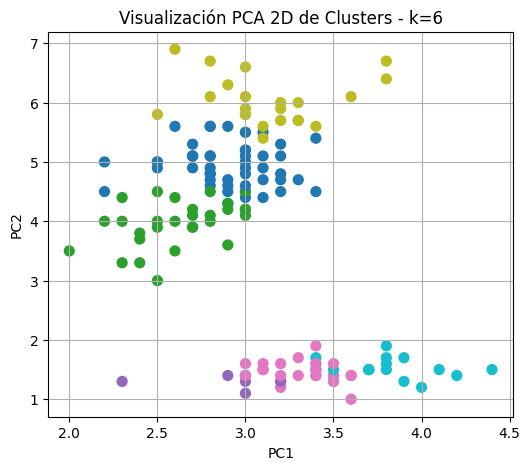

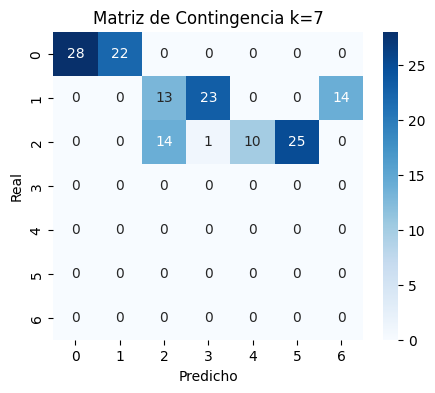

Adjusted Rand Index k=7: 0.431873738834189
F1 Score k=7: 0.15451215451215453


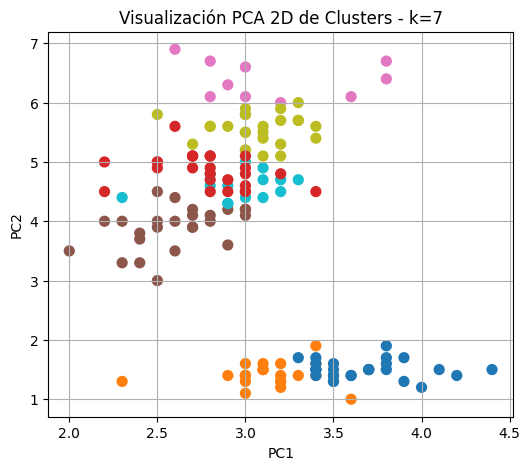

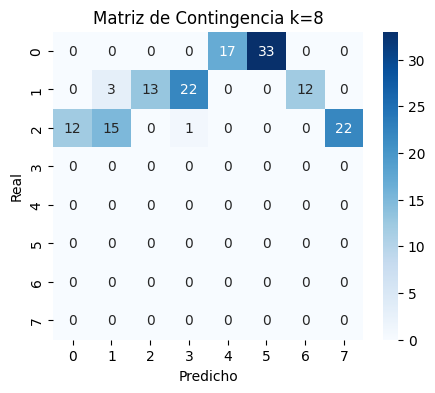

Adjusted Rand Index k=8: 0.4518375501892302
F1 Score k=8: 0.011029411764705883


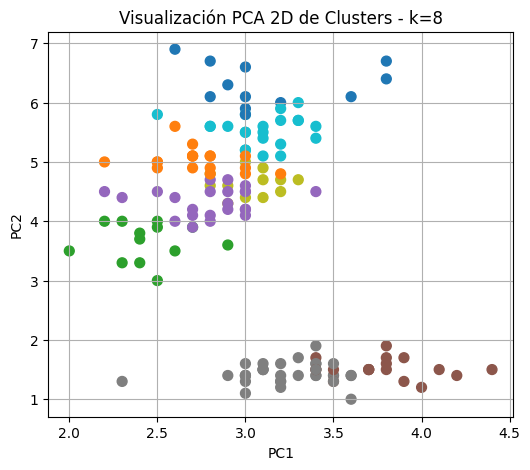

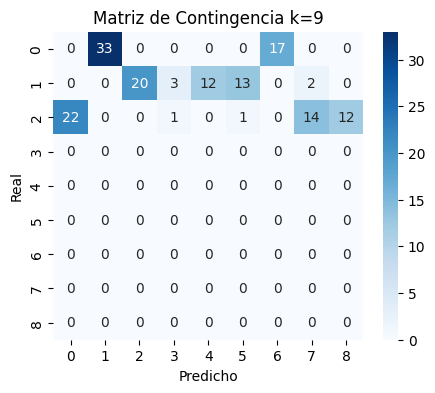

Adjusted Rand Index k=9: 0.4409280355206707
F1 Score k=9: 0.0


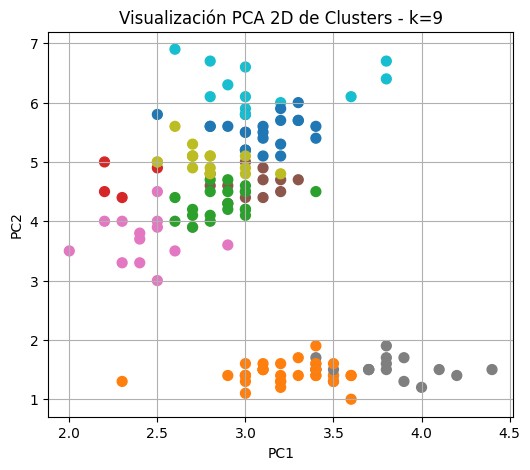

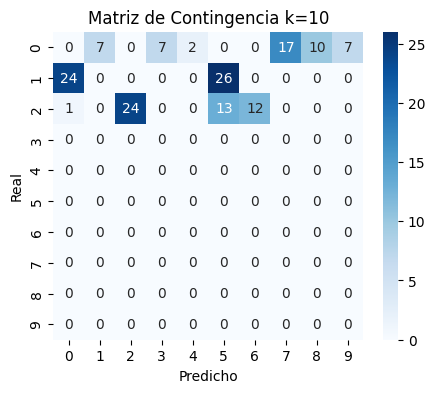

Adjusted Rand Index k=10: 0.34526318460267397
F1 Score k=10: 0.06486486486486487


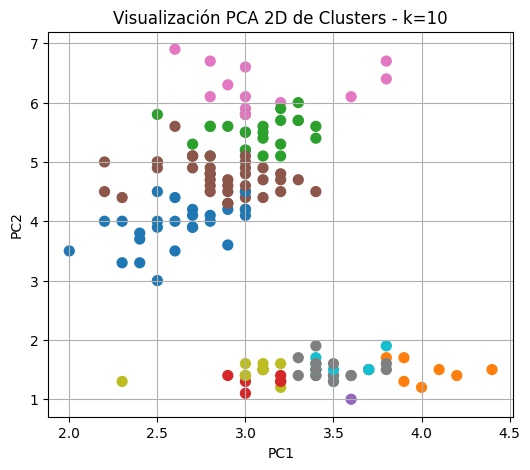

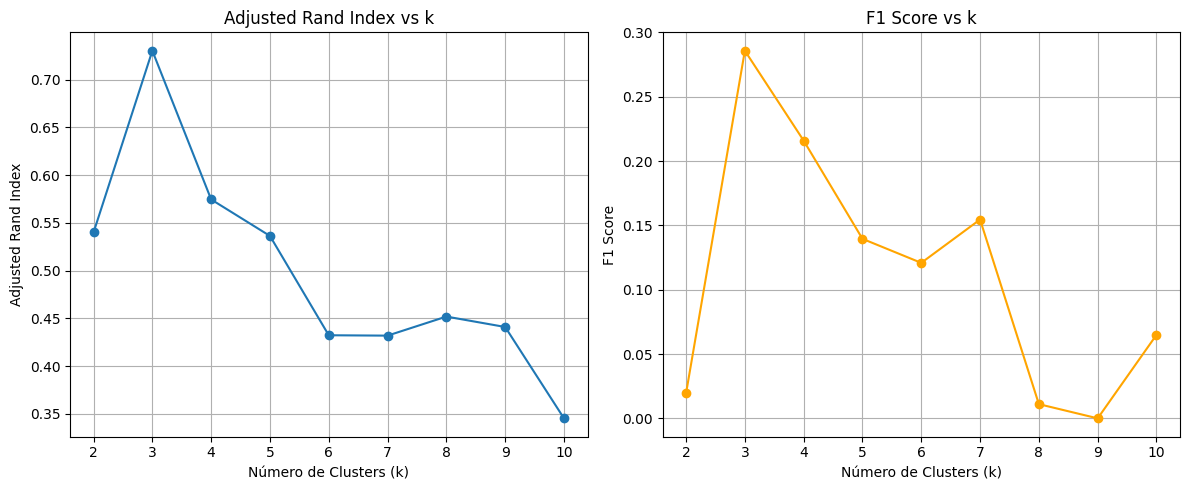

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, adjusted_rand_score, f1_score
from Kmeans import Kmeans

# cargar dataset
data = load_iris()
x = data.data
y = data.target

# rango de k a evaluar
k_values = range(2, 11)

# listas para almacenar métricas
confusion_matrixs = []
ari_scores = []
f1_scores = []

# conseguir simil a x en 2d
#pca = PCA(n_components=2)  # queremos reducir a 2D
#x_2d = pca.fit_transform(x)  # proyectamos los datos

# sino agarrar 2 dimensiones, pero la distribucion no queda tan representativa
x_2d = x[:, 2:4]  # largo y ancho

for k in k_values:
    kmeans = Kmeans(N=k)
    kmeans.entrenar(x)
    y_pred = kmeans.predecir(x)

    # matriz de confusión y métricas
    cm = confusion_matrix(y, y_pred)
    confusion_matrixs.append(cm)


    # heatmap matriz de contingencia
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Contingencia k={k}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()

    # print de metricas
    ari = adjusted_rand_score(y, y_pred)
    ari_scores.append(ari)
    print(f"Adjusted Rand Index k={k}: {ari}")
    f1 = f1_score(y, y_pred, average='macro')
    f1_scores.append(f1)
    print(f"F1 Score k={k}: {f1}")

    # Visualización 2D del clustering
    plt.figure(figsize=(6,5))
    plt.scatter(x_2d[:,0], x_2d[:,1], c=y_pred, cmap='tab10', s=50)
    plt.title(f'Visualización PCA 2D de Clusters - k={k}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid()
    plt.show()

# graficar métricas
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, ari_scores, marker='o')
plt.title('Adjusted Rand Index vs k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Adjusted Rand Index')
plt.grid()

plt.subplot(1,2,2)
plt.plot(k_values, f1_scores, marker='o', color='orange')
plt.title('F1 Score vs k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('F1 Score')
plt.grid()

plt.tight_layout()
plt.show()
